<a href="https://colab.research.google.com/github/john591/vehiclesClassification/blob/master/TpDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import openml
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Télécharger et préparer le dataset depuis OpenML (ID 54)
dataset = openml.datasets.get_dataset(54)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Encodage de la variable cible
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Étape 4 : Définir les modèles
models = {
    "Naive Bayes": GaussianNB(),
    "K-NN": KNeighborsClassifier(),
    "SVM (SMO)": SVC(),
    "Neural Net": MLPClassifier(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}


In [ ]:
#Évaluation par validation croisée
print("Résultats de l'évaluation (accuracy moyenne avec cross-validation 5 folds):\n")

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    results[name] = mean_score
    print(f"{name}: {mean_score:.4f}")

Résultats de l'évaluation (accuracy moyenne avec cross-validation 5 folds):

Naive Bayes: 0.4787
K-NN: 0.6561
SVM (SMO): 0.5013
Neural Net: 0.5992
Random Forest: 0.7470


In [ ]:
#Comparaison triée
print("\n🔍 Comparaison finale (du plus performant au moins performant) :")
for model, score in sorted(results.items(), key=lambda item: item[1], reverse=True):
    print(f"{model}: {score:.4f}")


🔍 Comparaison finale (du plus performant au moins performant) :
Random Forest: 0.7470
K-NN: 0.6561
Neural Net: 0.5992
SVM (SMO): 0.5013
Naive Bayes: 0.4787


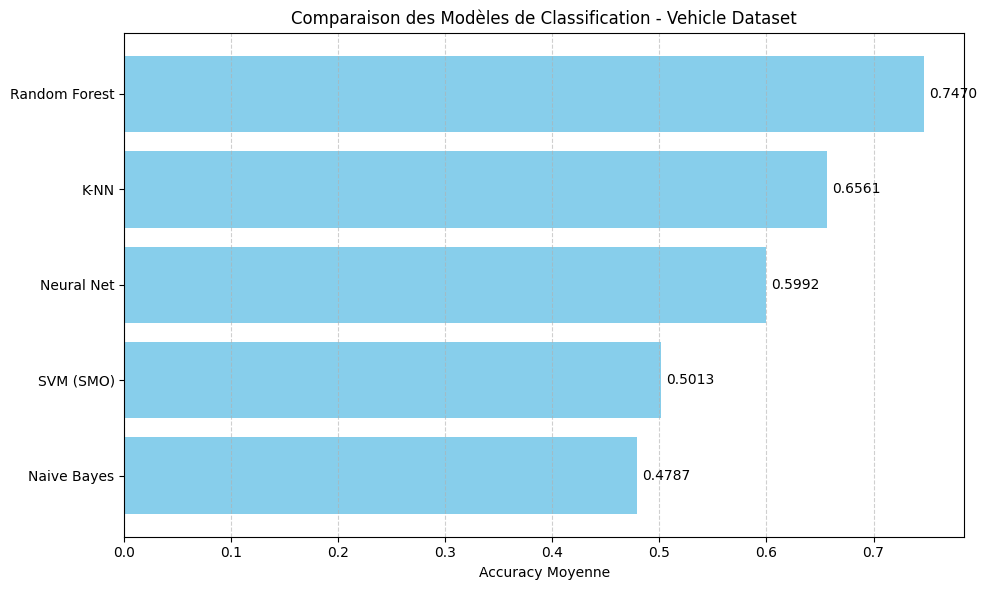

In [ ]:
#Visualisation
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color='skyblue')
plt.xlabel("Accuracy Moyenne")
plt.title("Comparaison des Modèles de Classification - Vehicle Dataset")
plt.gca().invert_yaxis()
for i, v in enumerate(sorted_results.values()):
    plt.text(v + 0.005, i, f"{v:.4f}", va='center')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
import openml
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Étape 3 : Télécharger et préparer le dataset depuis OpenML (ID 54)
dataset = openml.datasets.get_dataset(54)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Encodage des étiquettes (BUS, OPEL, SAAB, VAN) en chiffres
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Étape 4 : Définir les modèles à évaluer
models = {
    "Naive Bayes": GaussianNB(),
    "K-NN": KNeighborsClassifier(),
    "SVM (SMO)": SVC(),
    "Neural Net": MLPClassifier(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
print("Résultats de l'évaluation (accuracy moyenne avec cross-validation 5 folds):\n")

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    results[name] = mean_score
    print(f"{name}: {mean_score:.4f}")

Résultats de l'évaluation (accuracy moyenne avec cross-validation 5 folds):

Naive Bayes: 0.4787
K-NN: 0.6561
SVM (SMO): 0.5013
Neural Net: 0.6229
Random Forest: 0.7589


In [ ]:
# Étape 6 : Tri des résultats pour mieux comparer
print("\n🔍 Comparaison finale (du plus performant au moins performant) :")
for model, score in sorted(results.items(), key=lambda item: item[1], reverse=True):
    print(f"{model}: {score:.4f}")


🔍 Comparaison finale (du plus performant au moins performant) :
Random Forest: 0.7589
K-NN: 0.6561
Neural Net: 0.6229
SVM (SMO): 0.5013
Naive Bayes: 0.4787


In [ ]:
#Étape 7 : Visualisation des résultats avec matplotlib
import matplotlib.pyplot as plt

# Tri des résultats
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

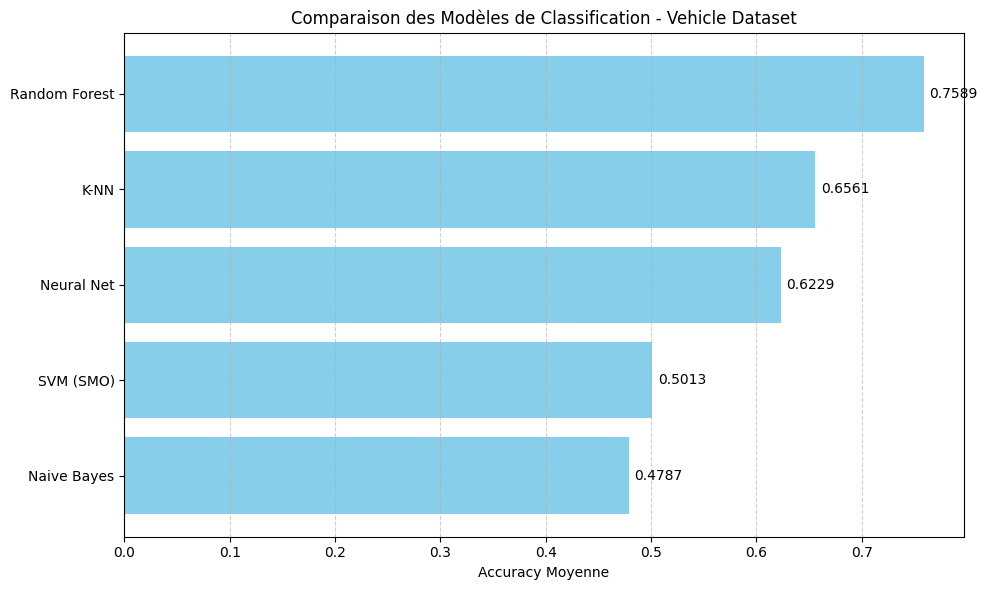

In [ ]:
# Création du barplot
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color='skyblue')
plt.xlabel("Accuracy Moyenne")
plt.title("Comparaison des Modèles de Classification - Vehicle Dataset")
plt.gca().invert_yaxis()  # Pour avoir le meilleur en haut
for i, v in enumerate(sorted_results.values()):
    plt.text(v + 0.005, i, f"{v:.4f}", va='center')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()